# `Multiple Linear Regression`
**`In multiple regression, we have multiple independent variables that impact the dependent variable`**

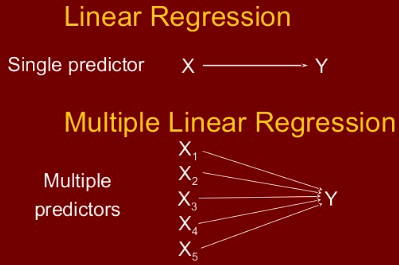

# Problem Statement:

Considering a real estate company that has a dataset containing prices of properties in say any region(Himalayas etc), It wishes to use data to optimise sale prices of properties based on important factors such as area, bedrooms, parking and other.

Essentially company wants —
* To identify variables affecting house prices, e.g. area, number of rooms, bathrooms etc

* To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc

* To know accuracy of the model, i.e. how well these variables can predict house prices



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
# Importing Housing.csv

data = pd.read_csv('Housing.csv')

In [3]:
# Looking at the first five rows

data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# Type of values stored in the columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [6]:
# looping on data.columns to get one col at a time and then finding unique value for each column
for i in data.columns:
    print(f'Column name: [{i}]\n',data[i].value_counts(),'\n','***'*20,'\n')

Column name: [price]
 3500000     17
4200000     17
4900000     12
3150000      9
5600000      9
            ..
6580000      1
4319000      1
4375000      1
4382000      1
13300000     1
Name: price, Length: 219, dtype: int64 
 ************************************************************ 

Column name: [area]
 6000    24
3000    14
4500    13
4000    11
5500     9
        ..
6862     1
4815     1
9166     1
6321     1
3620     1
Name: area, Length: 284, dtype: int64 
 ************************************************************ 

Column name: [bedrooms]
 3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64 
 ************************************************************ 

Column name: [bathrooms]
 1    401
2    133
3     10
4      1
Name: bathrooms, dtype: int64 
 ************************************************************ 

Column name: [stories]
 2    238
1    227
4     41
3     39
Name: stories, dtype: int64 
 ********************************************

Columns like `prefarea, airconditioning, hotwaterheating, basement, guestroom, mainroad` have values as yes and no which is difficult for ml model to understang 

Lets see how i am tryinh to prepare this data then

# Data Preparation
You can see that your dataset has many columns with values as 'Yes' or 'No'.

We need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'

In [7]:
# map Yes as 1 and No as 0 using map function

data['mainroad'] = data['mainroad'].map({'yes':1,'no':0})
data['guestroom'] = data['guestroom'].map({'yes':1,'no':0})
data['basement'] = data['basement'].map({'yes':1,'no':0})
data['hotwaterheating'] = data['hotwaterheating'].map({'yes':1,'no':0})
data['airconditioning'] = data['airconditioning'].map({'yes':1,'no':0})
data['prefarea'] = data['prefarea'].map({'yes':1,'no':0})

In [8]:
# observe changes in above data and prepared data
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [9]:
data.furnishingstatus.value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

`furnishingstatus` column have three diffrent things in it mentioned as `semi-furnished, unfurnished, furnished`

Now try to undestand what I am doing for this
* I am creating Dummy Variable(One-Hot Encodin) for this column


In [10]:
# Creating a dummy variable for 'furnishingstatus' or can say I am tring one-hot encoding on it

updated = pd.get_dummies(data['furnishingstatus'])
updated.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


It have created three variables all are not needed, so i will update my code a bit see

In [11]:
# use of drop_first 

updated = pd.get_dummies(data['furnishingstatus'],drop_first=True)
updated.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


`Why` you are removing first column??? If this is question you are asking upvote the notebook and ping me to uodate the notebook with all Answers to Why!!!

In [12]:
# adding updated to main data

data = pd.concat([data,updated],axis=1)


In [13]:
# Now let's see head of our dataframe again

data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


See `semi-furnished,unfurnished` are two new encoded columns made using `furnishingstatus`,

Now removing `furnishingstatus` column

In [14]:
# Dropping furnishingstatus from data as we have created the dummies for it
data.drop(['furnishingstatus'],axis=1,inplace=True)

In [15]:
# Now let's see head of our dataframe again

data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


# Creating New Variables
* `area_per_bedroom` => `area / bedrooms`  => this will be area per bedroom
* `bathrooms_per_bedroom` => `bedrooms / bedrooms`

In [16]:
# creating first new metric and assigning it to "area_per_bedroom"

data['area_per_bedroom'] = data.area / data.bedrooms

In [17]:
# Create second new metric and assigning it to "bathrooms_per_bedroom"
data['bathrooms_per_bedroom'] = data.bathrooms / data.bedrooms

In [18]:
# print data head

data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,area_per_bedroom,bathrooms_per_bedroom
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.0,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,0.250000


Observe two new columns as `area_per_bedroom`,`bathrooms_per_bedroom`

# Rescaling Features

It is extremely important to rescale variables so that they have a comparable scale 

Two common ways of rescaling which you might be knowing are:
1. `Normalisation` (min-max scaling)
2. `Standardisation` (Z-score) (mean-0,sigma-1)

**`I am trying to apply Normalisation`**


Formula: <br>
`(x-min(x))/(max(x) - min(x))`

In [19]:
# making a normalisation function

def normalize(col):
    return ((col-np.min(col)) / (np.max(col) - np.min(col)))


# applying normalize() fucntion to all columns using apply function 

data = data.apply(normalize)

In [20]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,area_per_bedroom,bathrooms_per_bedroom
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.0,0.237016,0.4
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.298923,1.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,1.0,0.0,0.472584,0.6
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.0,0.240232,0.4
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.0,0.237016,0.1


Observe `price` column in above data set and compare it with other data set, this is what scaling does.

Why we are doing Scalling??? Still not clear upvote the notebook and ping me.

In [21]:
# all columns 
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'area_per_bedroom', 'bathrooms_per_bedroom'],
      dtype='object')

# Splitting Data (Training and Testing Sets)

In [22]:
# all feature variable in X
X = data.drop('price',axis=1)

# response or target variable in y
y = data.price

In [23]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,area_per_bedroom,bathrooms_per_bedroom
0,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.0,0.237016,0.4
1,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.298923,1.0
2,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,1.0,0.0,0.472584,0.6
3,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.0,0.240232,0.4
4,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.0,0.237016,0.1


In [24]:
y.head()

0    1.000000
1    0.909091
2    0.909091
3    0.906061
4    0.836364
Name: price, dtype: float64

Splitting of test and train procedure involves taking a dataset and dividing it into two subsets 
    * First subset is used to fit the model and is referred to as training dataset
    * Second subset is not used to train the model; instead, input element of dataset is provided to the model, then predictions are made and compared to expected values. This second dataset is referred to as test dataset

`Why` I am doing train test split??

* Objective is to estimate performance of ML model on new data: data not used to train the model
* This is how we expect to use the model in practice, Namely to fit it on available data with known inputs and outputs, then make predictions on new examples in the future where we do not have expected output or target values
* `train-test procedure is appropriate when there is a sufficiently large dataset available`

In [25]:
# importing test_train_split module
from sklearn.model_selection import train_test_split

In [26]:
# test and train split with train_size as 30% and random state as 108

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=108)

* `test_size 0.3 means we are giving 30% of the data to test and rest 70% data to train to our model`
* `random_state = 108` make sure our results will be same

In [27]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((381, 15), (164, 15), (381,), (164,))

# Model (Linear)

In [28]:
# Importing statsmodels module as sm
import statsmodels.api as sm

In [29]:
# Adding a constant column to our X_train dataframe
X_train = sm.add_constant(X_train)

# create a first fitted model
linear_model_1 = sm.OLS(y_train,X_train).fit()

In [30]:
# observe summary of first linear model i.e linear_model_1

print(linear_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     48.24
Date:                Tue, 11 Oct 2022   Prob (F-statistic):           5.41e-77
Time:                        00:35:01   Log-Likelihood:                 366.10
No. Observations:                 381   AIC:                            -700.2
Df Residuals:                     365   BIC:                            -637.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.08

# Checking Multi-Collinearity
`It generally occurs when there are high correlations between two or more predictor variables` 
* Can also say as, one predictor variable can be used to predict other 
* This creates redundant information lead to skewing results in a Regression Model

I know you have some confusion with term `Collinearity` and `Multicollinearity`, lets dig into it

* `Collinearity is a linear association between two predictors` 
* `Multicollinearity` is a situation where two or more predictors are highly linearly related 
    * Severe multicollinearity is a problem because it can increase `Variance of the coefficient estimates` and make estimates very sensitive to minor changes in the model
    * Result is that coefficient estimates are unstable and difficult to interpret

So its important to remove Multicollinearity from our dataset

In [33]:
# Importing matplotlib and seaborn 
import matplotlib.pyplot as plt
import seaborn as sns

# magic function matplotlib inline
%matplotlib inline

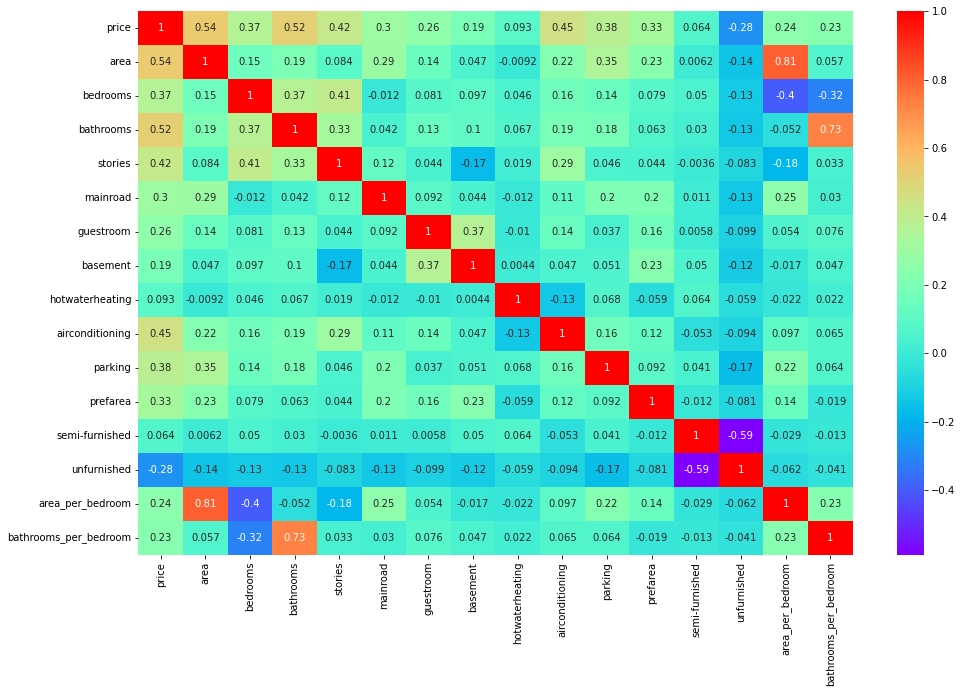

In [34]:
# observe correlation matrix of dataset

plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),annot=True,cmap='rainbow')

plt.show()

# Checking for Variable Inflation Factor
`Multicollinearity can be detected via various methods most common one is – VIF (Variable Inflation Factors)`
* VIF score of an independent variable represents how well variable is explained by other Independent Variables

`Note:` <br>
* `VIF starts at 1 and has no upper limit`
* `VIF = 1` =>  no correlation between Independent Variable and other variables
* `VIF exceeding 5 or 10` indicates high Multicollinearity between this independent variable and others

Although `Correlation Matrix` and `Scatter Plots` can also be used to find multicollinearity but their findings only show `Bivariate` relationship between `Independent Variables` <br>


**`How to apply VIF then??`**

I will define a function vif_scores that takes a dataframe with relevant input features and returns a dataframe with two columns
* Variables which has feature name
* VIF which has vif score for corresponding feature

I will run this function times and again and again as it will be required to drop all variables one by one with high vif (>5)


In [35]:
# import vif module
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [36]:
# vif_scores function as stated above

def vif_scores(data):
    vif = pd.DataFrame()
    vif['cols'] = data.columns
    vif['VIF'] = [VIF(data.values,i) for i in range(data.shape[1])]
    return vif.sort_values(by='VIF',ascending=False)


# printing vif scores for all current input features
vif_scores(X)

,cols,VIF
13,area_per_bedroom,68.707105
0,area,57.516048
14,bathrooms_per_bedroom,29.249998
2,bathrooms,11.106354
1,bedrooms,10.683404
4,mainroad,7.910522
3,stories,2.805901
11,semi-furnished,2.614252
12,unfurnished,2.382862
6,basement,2.045854


# Dropping Variable and Updating Model
`Dropping Highly Correlated Variables and Insignificant Variables through both correlation matrix and vif scores`

We can see there are two groups of multicollinear variables

`Group-1`: area_per_bedroom and area <br>
`Group-2`: bathrooms_per_bedroom and bathrooms

* `Group-1` is neccesary for us to keep as it is gives relevant impact on traget but 
* `Group-2` bathrooms_per_bedroom is not as significant as bathrooms so I am trying drop it off

In [37]:
# checking vif scores again, after removing bathrooms_per_bedroom from features

vif_scores(X.drop('bathrooms_per_bedroom',1))

/var/folders/ww/y3w0wcq56c50q43_ktzppn800000gq/T/ipykernel_73864/3536652553.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  vif_scores(X.drop('bathrooms_per_bedroom',1))


,cols,VIF
0,area,20.716025
13,area_per_bedroom,18.437262
1,bedrooms,10.026456
4,mainroad,7.459237
3,stories,2.783201
11,semi-furnished,2.484125
12,unfurnished,2.204838
6,basement,2.027730
9,parking,2.004052
8,airconditioning,1.768236


vif scores are still high trying to drop `bedrooms` also as input feature and again check vif scores

In [38]:
# checking vif scores after removing bedrooms from remaining features

vif_scores(X.drop(['bedrooms','bathrooms_per_bedroom'],1))

/var/folders/ww/y3w0wcq56c50q43_ktzppn800000gq/T/ipykernel_73864/3012998216.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  vif_scores(X.drop(['bedrooms','bathrooms_per_bedroom'],1))


,cols,VIF
0,area,14.978857
12,area_per_bedroom,13.881473
3,mainroad,6.099134
2,stories,2.559555
10,semi-furnished,2.037729
8,parking,1.999982
5,basement,1.901473
7,airconditioning,1.762488
11,unfurnished,1.722278
1,bathrooms,1.692180


Observe and you will find out vif scores are still high 

* Lets drop area_per_bedroom which was calculated as input feature and again check vif scores

`How to use your Intuition:`

`Its very natural that both area, bedroom and area_per_bedroom will be highly correlated with each other as area_per_bedroom is calculated out of area and bedroom`

In [39]:
# check vif scores after removing area_per_bedroom from remaining features
vif_scores(X.drop(['bedrooms','bathrooms_per_bedroom','area_per_bedroom'],1))

/var/folders/ww/y3w0wcq56c50q43_ktzppn800000gq/T/ipykernel_73864/1308270218.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  vif_scores(X.drop(['bedrooms','bathrooms_per_bedroom','area_per_bedroom'],1))


,cols,VIF
3,mainroad,5.513523
0,area,4.427217
2,stories,2.323144
10,semi-furnished,2.004738
8,parking,1.987943
5,basement,1.896942
7,airconditioning,1.760737
11,unfurnished,1.652372
1,bathrooms,1.619363
9,prefarea,1.497335


Observe and you will find still vif score of `mainroad` is more than 5 
    * But if observe only `mainroad` feature which having high vif score does'nt mean that one will remove it

* One need to see importance of that particular feature also in `price` prediction
    * As `mainoad`, `area` and `stories` are really important for price prediction
* I am tring to go with removing `semi-furnished` feature next

In [40]:
# Lets check vif scores after removing semi-furnished from remaining features 

vif_scores(X.drop(['bedrooms','bathrooms_per_bedroom','area_per_bedroom','semi-furnished'],1))

/var/folders/ww/y3w0wcq56c50q43_ktzppn800000gq/T/ipykernel_73864/1373815795.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  vif_scores(X.drop(['bedrooms','bathrooms_per_bedroom','area_per_bedroom','semi-furnished'],1))


,cols,VIF
3,mainroad,4.845386
0,area,4.362200
2,stories,2.301304
8,parking,1.987700
5,basement,1.860222
7,airconditioning,1.753933
1,bathrooms,1.619286
9,prefarea,1.490106
4,guestroom,1.470984
10,unfurnished,1.341568


Observe that `mainroad` vif was `5.513523` which got droped to `4.845386` after droping `semi-furnished`, so always keep in mind understanding data is the key. I would have droped `mainrod` before by only observing therhold of < 5 but I didnt did that.If I will drop `mainrod` it will effect our prediction.


Still vif scores of some features are close to 5
* first five features are of importance but then least important among them would be `basement`

In [41]:
# Lets check vif scores after removing basement from remaining features 

score = vif_scores(X.drop(['bedrooms','bathrooms_per_bedroom','area_per_bedroom','semi-furnished','basement'],1))
score

/var/folders/ww/y3w0wcq56c50q43_ktzppn800000gq/T/ipykernel_73864/2771500496.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  score = vif_scores(X.drop(['bedrooms','bathrooms_per_bedroom','area_per_bedroom','semi-furnished','basement'],1))


,cols,VIF
3,mainroad,4.583261
0,area,4.362124
2,stories,2.206626
7,parking,1.986493
6,airconditioning,1.749777
1,bathrooms,1.589915
8,prefarea,1.442071
9,unfurnished,1.340895
4,guestroom,1.291867
5,hotwaterheating,1.079947


`Observation:` <br>
* vif scores is almost less than 5

* I have removed 5 features namely 'bedrooms','bathrooms_per_bedroom','area_per_bedroom','semi-furnished','basement'

`Droping above mentioned 5 features from X as well and rebuilding model again` 

In [42]:
# collecting relevent columns name 
for i in score.cols:
    print(i)

mainroad
area
stories
parking
airconditioning
bathrooms
prefarea
unfurnished
guestroom
hotwaterheating


Above are relevent columns after dropping highly correlated variables

In [43]:
# features
X = data[[column for column in score.cols]]

# Putting response variable to y ie. price
y = data.price

In [44]:
X.head()

,mainroad,area,stories,parking,airconditioning,bathrooms,prefarea,unfurnished,guestroom,hotwaterheating
0,1.0,0.396564,0.666667,0.666667,1.0,0.333333,1.0,0.0,0.0,0.0
1,1.0,0.502405,1.000000,1.000000,1.0,1.000000,0.0,0.0,0.0,0.0
2,1.0,0.571134,0.333333,0.666667,0.0,0.333333,1.0,0.0,0.0,0.0
3,1.0,0.402062,0.333333,1.000000,1.0,0.333333,1.0,0.0,0.0,0.0
4,1.0,0.396564,0.333333,0.666667,1.0,0.000000,0.0,0.0,1.0,0.0


In [45]:
y.head()

0    1.000000
1    0.909091
2    0.909091
3    0.906061
4    0.836364
Name: price, dtype: float64

In [46]:
# train test split again on X and y

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=108)

In [47]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((381, 10), (381,), (164, 10), (164,))

# Building Linear Model Again

In [48]:
# Adding a constant column to dataframe
X_train = sm.add_constant(X_train) 

# Adding a constant variable to test dataframe
X_test = sm.add_constant(X_test)

# create a second fitted model
linear_model_2 = sm.OLS(y_train,X_train).fit()


#printing linear_model_2 summary
print(linear_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     69.33
Date:                Tue, 11 Oct 2022   Prob (F-statistic):           1.45e-78
Time:                        00:38:49   Log-Likelihood:                 359.04
No. Observations:                 381   AIC:                            -696.1
Df Residuals:                     370   BIC:                            -652.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0469      0.016     

In [49]:
# predictions

y_pred = linear_model_2.predict(X_test)

y_pred.head()

350    0.280570
433    0.151794
477    0.113951
46     0.478006
294    0.218982
dtype: float64

# Model Evaluation
`Performance of Regression Model` must be reported as an error in those predictions 
* It will be good to know if model predicted value exactly. (this might be intractably difficult in practice) so instead I am intrusted to know how close predictions are to expected values

`Error addresses exactly this and summarizes on average how close predictions were to their expected values`

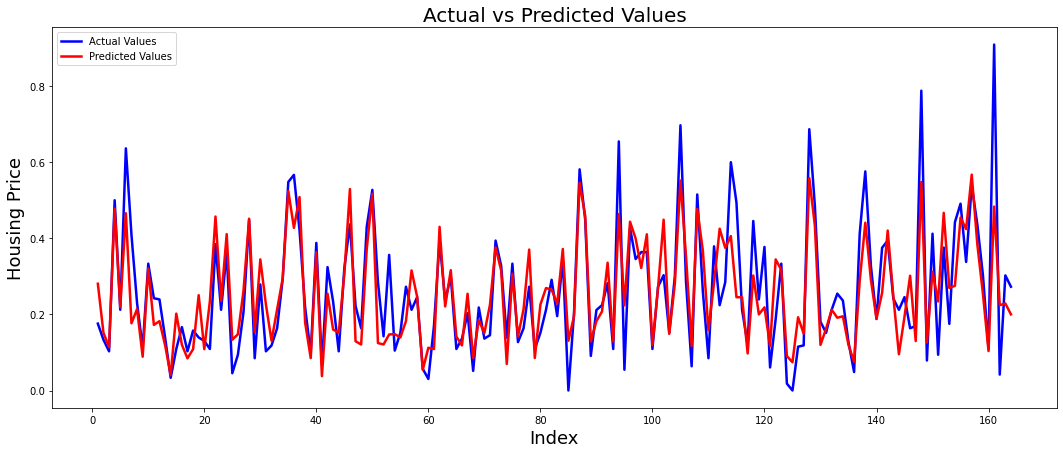

In [50]:
# Actual values vs Predicted values graph 
plt.figure(figsize=(18,7))
count = [i for i in range(1,165,1)]
plt.plot(count,y_test,c='blue',linewidth=2.5,linestyle='-',label='Actual Values')  # taking y_test (Actual) to plot
plt.plot(count,y_pred,c='red',linewidth=2.5,linestyle='-',label='Predicted Values') # taking y_pred to compare with y_test (Predicted) to plot

# Plot heading
plt.legend(loc=0)
plt.title('Actual vs Predicted Values',fontsize=20)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Housing Price',fontsize=18)

plt.show()

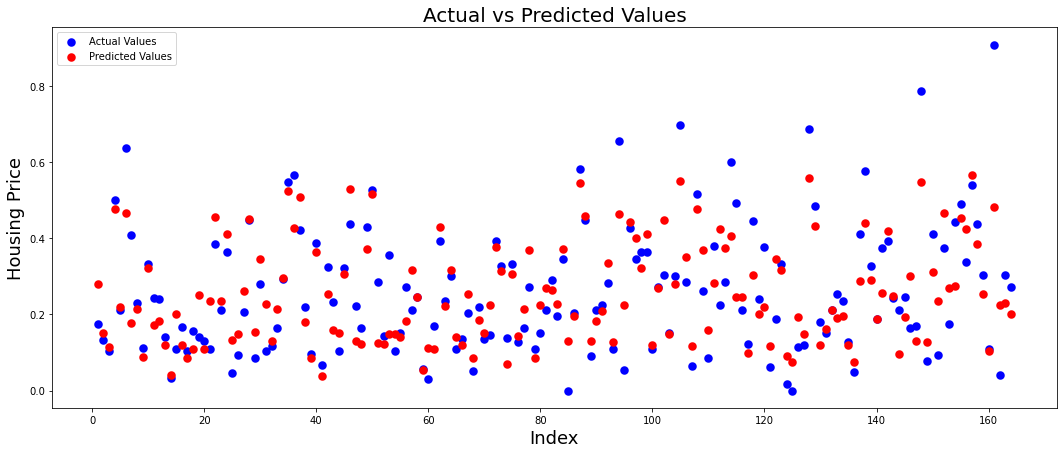

In [51]:
# Actual values vs Predicted values graph  (scatter plot for more clear intution)
plt.figure(figsize=(18,7))
count = [i for i in range(1,165,1)]
plt.scatter(count,y_test,c='blue',linewidth=2.5,linestyle='-',label='Actual Values')  # taking y_test (Actual) to plot
plt.scatter(count,y_pred,c='red',linewidth=2.5,linestyle='-',label='Predicted Values') # taking y_pred to compare with y_test (Predicted) to plot

# Plot heading
plt.legend(loc=0)
plt.title('Actual vs Predicted Values',fontsize=20)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Housing Price',fontsize=18)

plt.show()

**`Error = True Values - Predicted Values`**

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


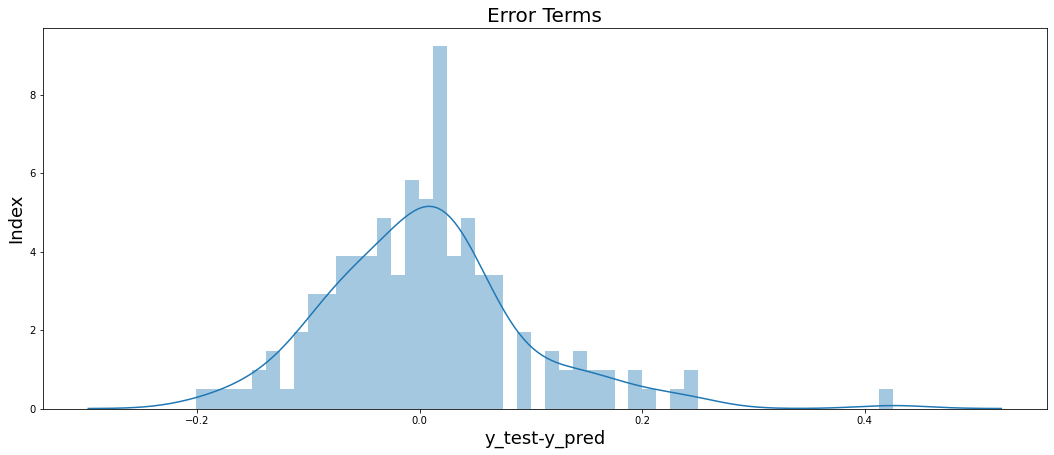

In [54]:
# trying to understand distribution by plotting error_terms as dist_plot
#plot distplot of error tem

plt.figure(figsize=(18,7))
sns.distplot((y_test-y_pred),bins=50)

plt.title('Error Terms',fontsize=20)
plt.xlabel('y_test-y_pred',fontsize=18)
plt.ylabel('Index',fontsize=18)

plt.show()

# Regression Evaluation Metrics
I am trying to take first three error metrics that are commonly used for evaluating and reporting performance of a Regression Model:
1. `Mean Squared Error (MSE)`
2. `Root Mean Squared Error (RMSE)`
3. `Mean Absolute Error (MAE)`
4. MEAN ABSOLUTE PERCENTAGE ERROR (MAPE)
5. RELATIVE ABSOLUTE ERROR (RAE)
6. `R-SQUARE or Coefficient of determination` 
7. ADJUSTED R-SQUARE
8. MEDIAN ABSOLUTE ERROR (MedAE)

[Regression Evaluation Metrics](https://scikit-learn.org/stable/modules/classes.html#regression-metrics)

[More detail](https://www.aionlinecourse.com/tutorial/machine-learning/evaluating-regression-models-performance)

In [55]:
#import metrics module
from sklearn import metrics

In [56]:
# calculating and printin RMSE
print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}')

#calculating and printin MSE
print(f'MSE : {metrics.mean_squared_error(y_test,y_pred)}')

#calculate and print MAE
print(f'MAE : {metrics.mean_absolute_error(y_test,y_pred)}')

RMSE : 0.08954475046778894
MSE : 0.008018262336338587
MAE : 0.0653680064896952


# Feature Selection

I have obtained initial error metric/s and took a note of which X’s have minimal impacts on y
    * Removing some of these features may result in an increased accuracy of the model


So I am begning a process of trial and error where in process is started over again until a satisfactory model is produced

To do this we already have a ready made library called RFE,
Recursive feature elimination is the process of iteratively finding the most relevant features from the parameters of a learnt ML model.

`So I am doing feature selection using RFE using LinearRegression module`

[More about RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)

In [55]:
# Importing Recursive feature elimination and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [56]:
# Initializing linearRegression function 
lin_reg = LinearRegression()
# Initialising RFE using LRinstance
rfe = RFE(lin_reg)     
# Fitting and running RFE with X_train and y_train
rfe = rfe.fit(X_train,y_train)

# boolean results for each features
print(f'Boolean results for each features: {rfe.support_}','\n') 
# ranks for each features
print(f'Ranks for each features: {rfe.ranking_}')

Boolean results for each features: [False False  True  True  True False  True False False False  True] 

Ranks for each features: [7 6 1 1 1 2 1 3 4 5 1]


In [57]:
# total no. of features in X
print(f'Total no. of features in X : {len(X.columns)}')

#Get columns which are supported by RFE
col = X_train.columns[rfe.support_]

# print col
print(f'Supported columns by RFE : {col}')

Total no. of features in X : 10
Supported columns by RFE : Index(['area', 'stories', 'parking', 'bathrooms', 'hotwaterheating'], dtype='object')


`6 features got selected out of initial 11 features`

# Visualising Selected Columns Data

In [58]:
col

Index(['area', 'stories', 'parking', 'bathrooms', 'hotwaterheating'], dtype='object')

# Modeling again with Above Selected Features using Recursive Feature Elimination(RFE)
This is going to be the third model

In [61]:
# list of selected columns using Recursive Feature Elimination (RFE)
col

Index(['area', 'stories', 'parking', 'bathrooms', 'hotwaterheating'], dtype='object')

In [62]:
# features
X = data[[column for column in col]]

# Putting response variable to y ie. price
y = data.price

In [63]:
X.head()

,area,stories,parking,bathrooms,hotwaterheating
0,0.396564,0.666667,0.666667,0.333333,0.0
1,0.502405,1.000000,1.000000,1.000000,0.0
2,0.571134,0.333333,0.666667,0.333333,0.0
3,0.402062,0.333333,1.000000,0.333333,0.0
4,0.396564,0.333333,0.666667,0.000000,0.0


In [64]:
y.head()

0    1.000000
1    0.909091
2    0.909091
3    0.906061
4    0.836364
Name: price, dtype: float64

In [65]:
# train test split again on X and y

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=108)

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((381, 5), (381,), (164, 5), (164,))

In [66]:
# Adding a constant column to dataframe
X_train = sm.add_constant(X_train) 

# Adding a constant variable to test dataframe
X_test = sm.add_constant(X_test)

# create a second fitted model
linear_model_3 = sm.OLS(y_train,X_train).fit()


#printing linear_model_3 summary
print(linear_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     89.82
Date:                Mon, 25 Oct 2021   Prob (F-statistic):           6.05e-62
Time:                        06:54:16   Log-Likelihood:                 307.94
No. Observations:                 381   AIC:                            -603.9
Df Residuals:                     375   BIC:                            -580.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0671      0.012     

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [67]:
# Calculating Vif scores on data with selected columns by RFE

vif_scores(data[col])

,cols,VIF
0,area,2.421263
2,parking,1.898474
1,stories,1.811602
3,bathrooms,1.557969
4,hotwaterheating,1.048311


These features looks good to go with

**`Using model to make predictions`**

In [68]:
# predictions
y_pred = linear_model_3.predict(X_test)
y_pred.head()

350    0.279997
433    0.210317
477    0.159333
46     0.477064
294    0.270974
dtype: float64

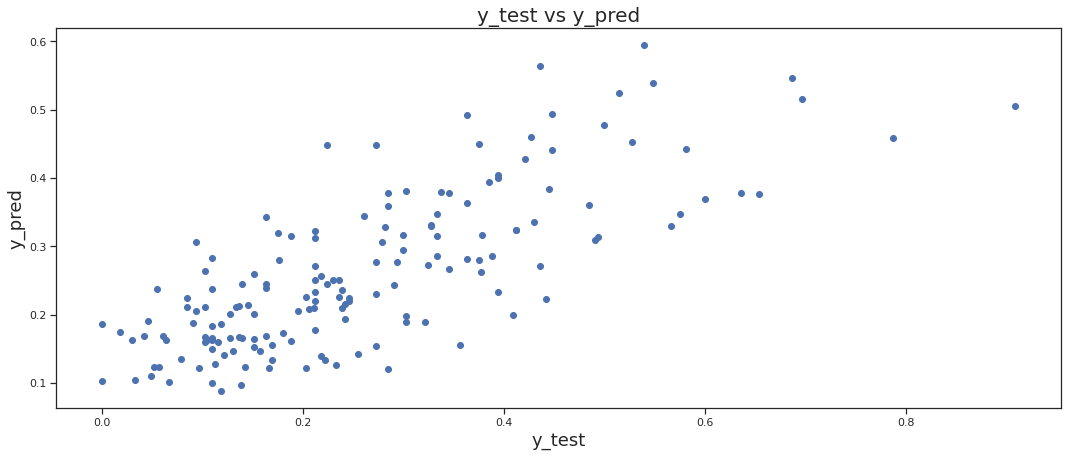

In [69]:
# Plotting y_test and y_pred to understand spread

#plotting scatter plot between actual and predicted
plt.figure(figsize=(18,7))
plt.scatter(y_test,y_pred)

plt.title('y_test vs y_pred',fontsize=20)
plt.xlabel('y_test',fontsize=18)
plt.ylabel('y_pred',fontsize=18)

plt.show()

In [70]:
# Print RMSE, MSE and MAE scores for linear_model_3

print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}')
print(f'MSE : {metrics.mean_squared_error(y_test,y_pred)}')
print(f'MAE : {metrics.mean_absolute_error(y_test,y_pred)}')

RMSE : 0.10780709984364635
MSE : 0.011622370776697932
MAE : 0.0814297008469017


`Results of linear_model_2` <br>
RMSE : 0.08954475046778894

MSE : 0.008018262336338587

MAE : 0.0653680064896952

`Observation on Three models` <br>
Observing results can see that there is not much change in model performance compared to linear_model_2 
* Infact RMSE score got increased a bit, reason could be that we might have removed one or some features which were of importance

# Model Selection
### Summary of all three models

In [71]:
#print summary of all 3 built models

print(linear_model_1.summary(),'\n','| | | |'*20,'\n\n\n')
print(linear_model_2.summary(),'\n','| | | |'*20,'\n\n\n')
print(linear_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     48.24
Date:                Mon, 25 Oct 2021   Prob (F-statistic):           5.41e-77
Time:                        06:54:19   Log-Likelihood:                 366.10
No. Observations:                 381   AIC:                            -700.2
Df Residuals:                     365   BIC:                            -637.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.08

# Iterpreting Models by looking into Few Metric
For understanding Above model summary, understand:
1. `Coef:`
2. `R-squared:`
3. `Adj. R-squared:`

Trying to compare above given 3 metrics in all three models

# `Observation`
`1.` linear_model_2 is perfoming better in terms of Coefficient, R2 and adjusted r2
    * by observing metrics I calculated for linear_model_2 and linear_model_3 here linear_model_2 is better also

`So Finalising that linear_model_2 is the best model to solve our problem statement`  <br>
**ie.to optimise sale prices of properties based on important factors such as area, bedrooms, parking and other**

#  Multiple Linear Regression - Model Assumptions
Multiple Linear Regression Model is based on several assumptions which are listed below:-

1. `Linearity`: Linear relationship between Dependent variables and Independent variables
2. `Correlation`: Independent variables are not too highly correlated with each other
3. `yi observations` are selected independently and randomly from population
4. `Normal Distribution`: Residuals should be normally distributed with a mean of 0 and variance σ

----
# Advantages of Multiple Linear Regression
* Chances of getting a better-fit increase as generated models are dependent on more than 1 feature
* Multiple Linear Regression can detect outliers and anomalies very effectively

----
# Disadvantages of Multiple Linear Regression
* Problem of overfitting is very prevalent here, as we can use all features to generate the model, so the model can start "memorizing" the values
* Accuracy decreases as linearity of dataset decreases